In [17]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input{font-family:Consolas; font-size:12pt;}
div.prompt {min width:70px;}
div#toc-wrapper {padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe {font-size:12px;}
</style>
"""))

<font size='6' color='red'>ch10. N차원 배열(Numpy 배열) 다루기</font>
- [numpy](http://www.numpy.org)
- [numpy docs](http://www.numpy.org/doc/stable)
- 2차원 배열은 행렬내념으로 이해
- numpy 패키지를 이용(C언어로 구현된 고성능 수치계산 패키지)

# 1절 numpy 패키지

In [4]:
import numpy as np
np.__version__

'1.23.5'

In [6]:
#np.arrange(from, stop, by) : from부터 stop 앞까지 by씩 증가하는 1차원 배열을 생성
a = np.arange(15) # 0부터 15 앞까지 1씩 증가하는 1차원 배열
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## 1.1 배열 속성

In [13]:
from numpy import arange
a = arange(15,
          #dtype=np.int8 # 8 bit int로 배열 만들기 (default value of dtype : int32)
          ).reshape(3,5) # 3행 5열 2차원 배열로 변환
a

array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [14]:
type(a)

numpy.ndarray

In [17]:
a.dtype # a배열의 요소들의 type

dtype('int32')

In [20]:
a.dtype.name

'int32'

In [21]:
a.itemsize #a 배열안의 한 요소의 bytesize

4

In [22]:
a.ndim # 축수(차원수)

2

In [25]:
a.size # 배열 요소의 갯수

15

In [26]:
a.shape # 배열의 구조(3행5열)

(3, 5)

In [30]:
print('shape 조정 전 a\n', a, '\n')
a.shape = (5, 3)
print('shape 조정 후 a\n', a)

shape 조정 전 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]] 

shape 조정 후 a
 [[ 0  1  2]
 [ 3  4  5]
 [ 6  7  8]
 [ 9 10 11]
 [12 13 14]]


## 1.2 배열 타입 변경

In [32]:
a = arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [34]:
a.size, a.dtype, a.itemsize

(12, dtype('int32'), 4)

In [35]:
a.dtype = np.int64 # 읽을때 int64(64bit씩) 읽는다다
a.dtype 

dtype('int64')

In [37]:
a

array([[ 4294967296, 12884901890],
       [21474836484, 30064771078],
       [38654705672, 47244640266]], dtype=int64)

In [39]:
a.itemsize, a.size

(8, 6)

In [48]:
# dtype을 변경하고 싶다면
a = arange(12).reshape(3,4)
a.astype(np.int64)

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [49]:
a = a.astype('int64')
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [50]:
a.itemsize, a.size

(8, 12)

In [55]:
a.ravel(), a.flatten() # flatten 된 배열 return

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11], dtype=int64))

## 1.3 배열 저장
- pkl(객체, 배열, 머신러닝 모델 저장) vs npy(numpy 전용 포멧으로 저장, io 속도계산) 파일 둘 중 하나로 저장 가능

In [56]:
import pickle
with open('data/ch10.pkl', 'wb') as f:
    pickle.dump(a, f)

In [57]:
with open('data/ch10.pkl', 'rb') as f:
    loaded_a = pickle.load(f)
loaded_a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

In [58]:
np.save('data/ch10.npy', a)

In [60]:
loaded_a2 = np.load('data/ch10.npy')
loaded_a2

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]], dtype=int64)

# 2절 numpy 배열
- array() 함수를 이용하여 다른 파이썬 구조 (list, tuple)를 배열로 변환
- 기타함수 : arange, ones, zeros, full, empty, linspace ...
- 랜덤값을 갖는 함수들 : np.random.~

## 2.1 array() 함수로 numpy 배열 만들기
- array(obj, dtype, copy=T/F)

In [61]:
a = np.array([2,4,6], dtype=np.int16)
a

array([2, 4, 6], dtype=int16)

In [62]:
a[0], a[1], a[2]

(2, 4, 6)

In [79]:
b = np.array([[1.0, 2.3],  #배열은 동일 자료형의 집합 : 정수 -> 실수 -> 문자
             [4   , 5]])
b

array([[1. , 2.3],
       [4. , 5. ]])

In [80]:
b[0][1], b[0,1] #2차원 [axis0행, axis1열]

(2.3, 2.3)

In [81]:
print(b.dtype) # 실수 기본타입은 float64
print(b.itemsize)

float64
8


In [82]:
b = b.astype(np.float32)
b

array([[1. , 2.3],
       [4. , 5. ]], dtype=float32)

In [83]:
print(b.dtype) # 실수 기본타입은 float64
print(b.itemsize)

float32
4


In [84]:
for row in b:
    for col in row:
        print(col, end='\t')
    print() #개행

1.0	2.3	
4.0	5.0	


In [88]:
for i, row in enumerate(b):
    for j, col in enumerate(row):
        print('{}행 {}열 : {:.1f}({})'.format(i, j, col, b[i,j]), end='\t')
    print()

0행 0열 : 1.0(1.0)	0행 1열 : 2.3(2.299999952316284)	
1행 0열 : 4.0(4.0)	1행 1열 : 5.0(5.0)	


In [92]:
# 행렬의 인덱싱, 슬라이싱
b = np.array([[1,2,3,4,5], [6,7,8,9,10], [11,12,13,14,15]], dtype=np.int16)
b

array([[ 1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10],
       [11, 12, 13, 14, 15]], dtype=int16)

In [93]:
#인덱싱
b[0,1]

2

In [94]:
b[3,0] #없는 인덱싱시 에러

IndexError: index 3 is out of bounds for axis 0 with size 3

In [115]:
print('0~1행, 1~2열 : \n', b[0:2,1:3]) 
print('2행 모두 : \n', b[2])
print('4열(마지막열) 모두: \n', b[:,-1:], b[...,-1])
print('2행 0~3열 : \n', b[2,0:4])
print('마지막 열을 제외 : \n', b[:, :-1])

0~1행, 1~2열 : 
 [[2 3]
 [7 8]]
2행 모두 : 
 [11 12 13 14 15]
4열(마지막열) 모두: 
 [[ 5]
 [10]
 [15]] [ 5 10 15]
2행 0~3열 : 
 [11 12 13 14]
마지막 열을 제외 : 
 [[ 1  2  3  4]
 [ 6  7  8  9]
 [11 12 13 14]]


In [116]:
# 복제
## 스칼라 변수
a = 10
copy_a = a
print(f"a={a} 복제본={copy_a}")
copy_a = -1
print(f"a={a} 복제본={copy_a}")

a=10 copy_a=10
a=10 copy_a=-1


In [117]:
## 데이터 구조
a = [0, 1]
copy_a = a.copy() #깊은 복사
print(f"a={a}, 복제본={copy_a}")
copy_a[0] = -1
print(f"a={a}, 복제본={copy_a}")

a=[0, 1], 복제본=[0, 1]
a=[0, 1], 복제본=[-1, 1]


In [124]:
## np 배열
c = np.array([[1,2], [3,4]])
#d = c #주소 할당
#d = np.array(c, copy=True) #깊은 복사
d = c.copy()
print('c=', c, sep='\n')
print('d=', d, sep='\n')
print(id(c), id(d))
d[0,0] = 9
print('c=', c, sep='\n')
print('d=', d, sep='\n')

c=
[[1 2]
 [3 4]]
d=
[[1 2]
 [3 4]]
1590895522416 1590895518864
c=
[[1 2]
 [3 4]]
d=
[[9 2]
 [3 4]]


## 2.2 기본값이 있는 배열 만들기
- np.zeros((배열축)) : 요소들이 다 0
- np.ones((배열축)) : 요소들이 다 1
- np.full((배열축), 기본값) : 요소들이 다 기본값(두번째 매개변수)
- np.empty((배열축)) : 초기내용은 임의 값인 배열(메모리 상태에 따라 초기값 달라짐) (random 값이 아님)

※ 위의 함수를 이용해서 생성된 배열은 기본 dtype=float64. dtype속성을 따로 지정 가능

In [9]:
import numpy as np
x = np.zeros((3,)) # 3열짜리 1차원 float64 배열(요소들은 다 0)
x

array([0., 0., 0.])

In [11]:
x = np.zeros((2,5), dtype=np.bool8)
print(x)
print(x.dtype)
print(x.itemsize)

[[False False False False False]
 [False False False False False]]
bool
1


In [13]:
np.ones((2,5), dtype=np.complex64)

array([[1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j],
       [1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j, 1.+0.j]], dtype=complex64)

In [15]:
np.full( (2,3), 125)

array([[125, 125, 125],
       [125, 125, 125]])

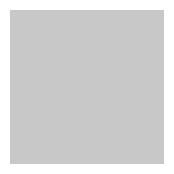

In [33]:
import matplotlib.pyplot as plt
plt.figure(figsize = (2,2)) # 시각화한 그래프 크기 figsize=(가로, 세로)
img = np.full((28,28), 200, dtype=np.uint8)
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.axis('off') # 축 없애기
plt.show()

In [34]:
np.empty((3,2)) #초기값이 메모리 상태에 따라 다름

array([[  0.,   0.],
       [  0., 200.],
       [200.,   0.]])

## 2.3 랜덤값을 갖는 배열 만들기
- np.random.random((배열축)) : 0부터 1 미만의 균등분포를 갖는 랜덤값 n차원 배열
- np.random.uniform(low=0, high=1, size=(배열축)) : low와 high 사이의 균등분포를 갖는 랜덤값 n차원 배열
- np.random.normal(loc=0.0, scale=1.0, size=(배열축)) : 평균 loc과 표준편차 scale을 갖는 정규분포 랜덤값 n차원 배열

- np.random.rand(n) : 0부터 1 미만의 균등분포를 갖는 랜덤값 1차원 배열
- np.random.randn(n) : 표준정규부표(평균 0, 표준편차 1)
cf) np.random.randint(from, to) : from부터 to 미만의 정수 난수 1개 발생 == random.randint(from, to-1)

In [35]:
import random
random.randint(1,3) # 1, 2, 3 중 하나

38

In [36]:
np.random.randint(1, 3) # 1, 2 중 하나

15

In [37]:
np.random.random((2,3))

array([[0.34708143, 0.41847989, 0.50108088],
       [0.94188175, 0.97949118, 0.91271481]])

<function matplotlib.pyplot.show(close=None, block=None)>

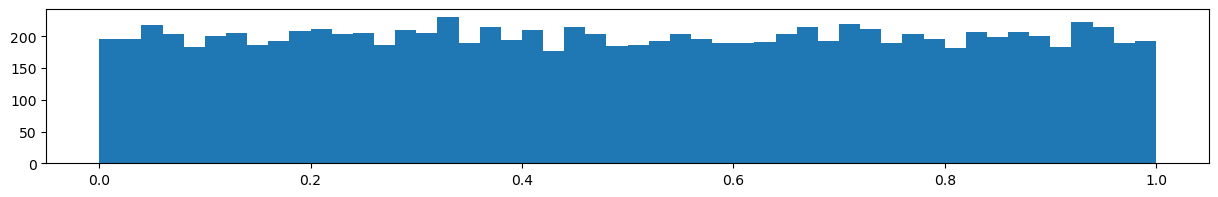

In [44]:
# 1차원 난수 배열
x = np.random.rand(10000) #균등분포
plt.figure(figsize = (15,2))
plt.hist(x, bins=50)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

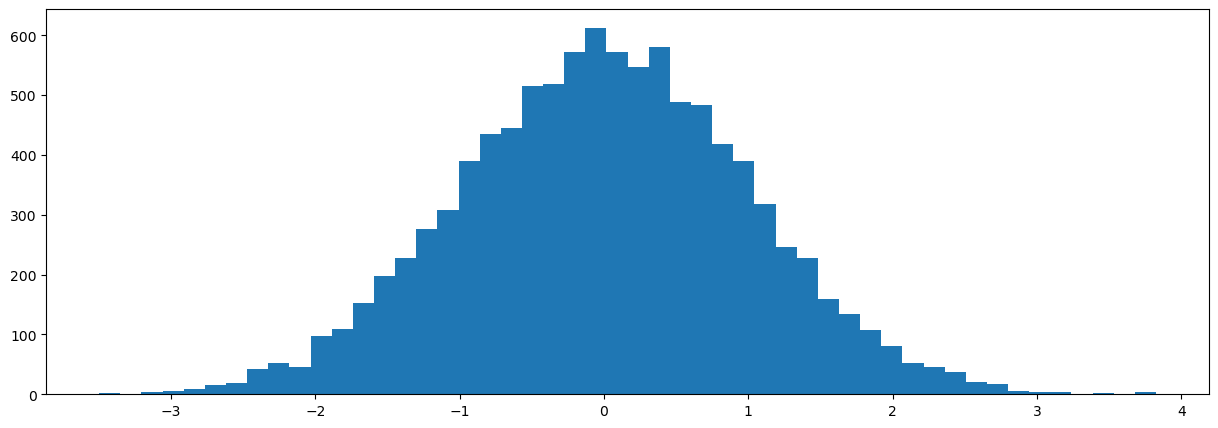

In [48]:
x = np.random.randn(10000) # 정규분포
plt.figure(figsize = (15,5))
plt.hist(x, bins = 50)
plt.show

In [49]:
# 2차원 난수 배열
np.random.random((2,5)) # 2행 5열짜리 균등분포(0~1) 난수 배열

array([[0.76006065, 0.6707228 , 0.80636733, 0.59771632, 0.36960378],
       [0.69724014, 0.25424098, 0.32299096, 0.15843252, 0.06434958]])

In [51]:
np.random.uniform(low=-2, high=2, size=(2,5)) # 2행 5열짜리 균등분포(-2~2) 난수 배열

array([[-0.75083705, -1.71870675, -0.27569289,  1.44399335,  1.75895332],
       [ 1.69268347,  0.2484431 , -1.40007589, -1.3660758 , -0.64183533]])

In [52]:
np.random.normal(size=(2,5)) # 2행 5열짜리 정규분포(평균 0 표준편차 1) 난수 배열

array([[-0.56237623, -0.36098522,  0.34352602,  0.39529929, -0.81687217],
       [-1.61950369,  1.54898234, -0.49571162,  0.72381998,  0.09070165]])

In [54]:
np.random.normal(-1, 1,size=(2,5)) # 2행 5열짜리 정규분포(평균 -1 표준편차 1) 난수 배열

array([[-2.69239006, -1.73661149, -0.18928588,  0.26250645, -0.76330854],
       [-0.54725911, -2.3107791 , -0.22797376, -2.78566854, -0.48720946]])

## 2.4 연속된 값을 갖는 1차원 배열 만들기
- np.arange(from, to, by, dtype) : from부터 to 앞까지 by씩 건너뛴 값을 1차원 배열로 생성
- np.linspace(from, to, num) : from부터 to(to포함)까지 num개 숫자들을 1차원 배열로 생성

In [56]:
np.arange(10, 30, 5, dtype=np.float64)

array([10., 15., 20., 25.])

In [58]:
np.arange(0, 2.0, 0.3)

array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8])

In [59]:
np.linspace(0, 5, 6)

array([0., 1., 2., 3., 4., 5.])

In [68]:
#linspace : 특정한 범위의 수들을 많이 생성할 때
x = np.linspace(0, 2*np.pi, 1000)
y = np.sin(x)

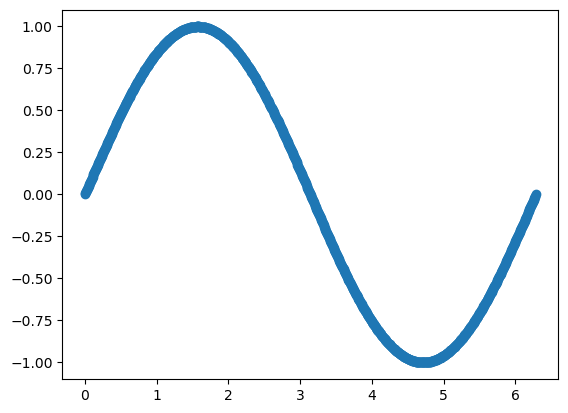

In [69]:
plt.scatter(x,y)
plt.show()

## 2.5 배열의 차원변경
- reshape(행수, 열수) : -1이 가능
- resize(행수, 열수) : -1이 불가
- T : 전치행렬로 변환 (transpose)
- transpose() : 전치행렬로 변환
- ravel(), flatten() : 1차원으로 변경

※ 실행결과가 출력되면 배열이 수정되지 않고, 실행결과가 없으면 배열이 수정됨

In [70]:
t = np.random.random((2,3))
t

array([[0.15727944, 0.84614326, 0.90604466],
       [0.68771433, 0.90480819, 0.31860099]])

In [71]:
a = np.round(t*10) # 반올림
a

array([[2., 8., 9.],
       [7., 9., 3.]])

In [73]:
a = a.astype(np.int16)
a

array([[2, 8, 9],
       [7, 9, 3]], dtype=int16)

In [75]:
a = a.reshape(-1,1) # -1이 주어지면 해당 차원의 크기가 자동 계산된다
a

array([[2],
       [8],
       [9],
       [7],
       [9],
       [3]], dtype=int16)

In [76]:
a = a.reshape(3,-1) # -1이 주어지면 해당 차원의 크기가 자동 계산된다
a

array([[2, 8],
       [9, 7],
       [9, 3]], dtype=int16)

In [78]:
a.resize(2,3)
a

array([[2, 8, 9],
       [7, 9, 3]], dtype=int16)

In [79]:
a.resize(2,-1) # resize는 -1 사용불가

ValueError: negative dimensions not allowed

In [84]:
# 전치행렬 (x행y열 -> y행x열)
a = a.T
a

array([[2, 7],
       [8, 9],
       [9, 3]], dtype=int16)

In [87]:
a.transpose()

array([[2, 8, 9],
       [7, 9, 3]], dtype=int16)

## 2.6 배열 출력

In [90]:
np.arange(2000) # 아이템 숫자가 1000개가 넘어가면 숫자를 전부 프린트하지 않음

array([   0,    1,    2, ..., 1997, 1998, 1999])

In [2]:
# 배열 요소가 몇개까지 다 출력되나. 1000개 요소 이상은 생략되서 출력
np.get_printoptions()['threshold']

1000

In [4]:
# 배열이 커서 인쇄가 안되는 경우 : 모서리부분만 출력
np.arange(10000).reshape(100,100)

array([[   0,    1,    2, ...,   97,   98,   99],
       [ 100,  101,  102, ...,  197,  198,  199],
       [ 200,  201,  202, ...,  297,  298,  299],
       ...,
       [9700, 9701, 9702, ..., 9797, 9798, 9799],
       [9800, 9801, 9802, ..., 9897, 9898, 9899],
       [9900, 9901, 9902, ..., 9997, 9998, 9999]])

In [5]:
# 인쇄 옵션 변경
import sys
np.set_printoptions(threshold=sys.maxsize) # 정수 최대치까지 출력가능
np.set_printoptions(threshold=np.inf) # 무한대까지 출력가능

In [6]:
np.arange(10000).reshape(100,100)

array([[   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,   10,
          11,   12,   13,   14,   15,   16,   17,   18,   19,   20,   21,
          22,   23,   24,   25,   26,   27,   28,   29,   30,   31,   32,
          33,   34,   35,   36,   37,   38,   39,   40,   41,   42,   43,
          44,   45,   46,   47,   48,   49,   50,   51,   52,   53,   54,
          55,   56,   57,   58,   59,   60,   61,   62,   63,   64,   65,
          66,   67,   68,   69,   70,   71,   72,   73,   74,   75,   76,
          77,   78,   79,   80,   81,   82,   83,   84,   85,   86,   87,
          88,   89,   90,   91,   92,   93,   94,   95,   96,   97,   98,
          99],
       [ 100,  101,  102,  103,  104,  105,  106,  107,  108,  109,  110,
         111,  112,  113,  114,  115,  116,  117,  118,  119,  120,  121,
         122,  123,  124,  125,  126,  127,  128,  129,  130,  131,  132,
         133,  134,  135,  136,  137,  138,  139,  140,  141,  142,  143,
         144,  145,  14

## 2.7 기본연산 동작
### 2.7.1 배열의 요소별 연산

In [3]:
# 리스트
a = [10, 20, 30, 40]
b= list(range(4))
a+b, a*3

([10, 20, 30, 40, 0, 1, 2, 3],
 [10, 20, 30, 40, 10, 20, 30, 40, 10, 20, 30, 40])

In [7]:
# numpy array
import numpy as np
a = np.array([10, 20, 30, 40])
b = np.array(list(range(4)))
a, b

(array([10, 20, 30, 40]), array([0, 1, 2, 3]))

In [8]:
a + b # 요소별 연산

array([10, 21, 32, 43])

In [9]:
a * 3 # 요소별 *3 연산

array([ 30,  60,  90, 120])

In [10]:
a * b # 요소별 * 연산

array([  0,  20,  60, 120])

In [11]:
a ** b # 요소별 제곱연산

array([    1,    20,   900, 64000])

In [12]:
a < 40 # 각 요소별 연산

array([ True,  True,  True, False])

In [15]:
print(a[[0,3]]) # ㅇ0,3번째 인덱스 item
print(a[[True, False, False, True]]) # 0,3은 True 1,2는 False 해서 True 인것만 추출

[10 40]
[10 40]


In [16]:
# a 배열에서 40보다 작은 데이터만 추출 (boolean index)
a[a<40]

array([10, 20, 30])

In [18]:
# a 배열에서 40보다 작은 데이터의 index
np.where(a<40)

(array([0, 1, 2], dtype=int64),)

### 2.7.2 행렬의 곱(@, dot 함수)
cf. *(요소별 곱)

In [19]:
A = np.array([[1,1],
             [0,1]])
B = np.array([[2,0],
              [3,4]])
A, B

(array([[1, 1],
        [0, 1]]),
 array([[2, 0],
        [3, 4]]))

In [21]:
print('요소별 곱 A*B =', A*B, sep='\n')
print('행렬 곱 A@B =', A@B, sep='\n')
print('행렬 곱 A.dot(B) =', A.dot(B), sep='\n')

요소별 곱 A*B =
[[2 0]
 [0 4]]
행렬 곱 A@B =
[[5 4]
 [3 4]]
행렬 곱 A.dot(B) =
[[5 4]
 [3 4]]


In [22]:
# 일반적으로는 행렬곱은 교환법칙이 성립 안 함
print('A@B=', A@B, sep='\n')
print('B@A=', B@A, sep='\n')

A@B=
[[5 4]
 [3 4]]
B@A=
[[2 2]
 [3 7]]


In [23]:
# pdf 19페이지 확인
A = np.array([[1,2],
             [3,4]])
B = np.array([[-1,-1],
              [1,1]])
A@B, B@A

(array([[1, 1],
        [1, 1]]),
 array([[-4, -6],
        [ 4,  6]]))

In [25]:
# 단위 행렬에서는 교환 법칙이 성립
A = np.array([[2,0],
             [3,4]])
B = np.array([[1,0],
              [0,1]])
A@B, B@A # B : 2행 2열짜리 단위행렬

(array([[2, 0],
        [3, 4]]),
 array([[2, 0],
        [3, 4]]))

In [26]:
np.eye(2) # 2행2열짜리 단위행렬

array([[1., 0.],
       [0., 1.]])

In [27]:
np.eye(3) # 3행3열짜리 단위행렬(정방행렬)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

### 2.7.3 복합 대입 연산자 사용(+=, -=, *=, ...)
- 배열에서의 a += b는 a= a+b와 다소 다르게 작동한다

In [33]:
a = np.ones((2,3), dtype=np.int8) # 2행 3열짜리 int8 배열
b = np.random.random((2,3)) # 2행 3열짜리 random값(0부터 1 미만의 균등분포를 갖는) float64 배열
print(a, b, sep='\n')

[[1 1 1]
 [1 1 1]]
[[0.88939369 0.95792234 0.04770765]
 [0.01923859 0.61065755 0.04195752]]


In [34]:
a += 256 # a+256 결과를 a에 넣는데, 공간이 부족하면 앞이 짤림
a

array([[1, 1, 1],
       [1, 1, 1]], dtype=int8)

In [35]:
a = a + 256 # a+256 결과를 새로운 a에 할당
a

array([[257, 257, 257],
       [257, 257, 257]], dtype=int16)

In [36]:
# a는 int16, b는 float64
b += a
b

array([[257.88939369, 257.95792234, 257.04770765],
       [257.01923859, 257.61065755, 257.04195752]])

In [37]:
a += b # a+b의 결과를 a에 넣는다
a

UFuncTypeError: Cannot cast ufunc 'add' output from dtype('float64') to dtype('int16') with casting rule 'same_kind'

### 2.7.4 배열 요소별 집계
- sum, min, max, mean, var(분산), std(표준편차)

In [38]:
a = np.array([[2,2,2,3],
              [4,3,2,1]])
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [42]:
print('전체 합 :', a.sum(), np.sum(a))
print('전체 평균 :', a.mean(), np.mean(a))
print('전체 최소값 :', a.min(), np.min(a))
print('전체 최대값 :', a.max(), np.max(a))
print('전체 분산 :', a.var(), np.var(a))
print('전체 표준편차 :', a.std(), np.std(a))

전체 합 : 19 19
전체 평균 : 2.375 2.375
전체 최소값 : 1 1
전체 최대값 : 4 4
전체 분산 : 0.734375 0.734375
전체 표준편차 : 0.8569568250501305 0.8569568250501305


In [46]:
# 분산에 루트를 씌우면 표준편차
import math
math.sqrt(a.var()) # math.sqrt(스칼라데이터)

0.8569568250501305

### 2.7.5 배열 축별 집계
- 축별 sum, min, max, mean, var, std, argmax(최대값 index)

In [47]:
a

array([[2, 2, 2, 3],
       [4, 3, 2, 1]])

In [51]:
# 행별 합계 axis=0(행), axis=1(열)
print('a의 행별 합 : ', a.sum(axis=1), np.sum(a, axis=1))
print('a의 행별 평균 : ', a.mean(axis=1), np.mean(a, axis=1))

a의 행별 합 :  [ 9 10] [ 9 10]
a의 행별 평균 :  [2.25 2.5 ] [2.25 2.5 ]


In [52]:
# 열별 합계
print('a의 열별 합 : ', a.sum(axis=0), np.sum(a, axis=0))
print('a의 열별 평균 : ', a.mean(axis=0), np.mean(a, axis=0))

a의 열별 합 :  [6 5 4 4] [6 5 4 4]
a의 열별 평균 :  [3.  2.5 2.  2. ] [3.  2.5 2.  2. ]


## 2.8 그 외 요소별 계산하는 범용 함수들
- 메모리를 효율적으로 사용할수 있음
    - np.add(A, B, C) C=A+B, C=np.add(A,B)
    - np.multiply(A, B, C) C=A*B, C=A*B
    - np.subtract(A, B, C) ...
    - np.sqrt(배열) : 제곱근 cf math.sqrt(스칼라변수)

In [53]:
a = np.array([1,2])
b = np.array([3,4])
c = np.empty(2)
a, b, c

(array([1, 2]), array([3, 4]), array([1.06099790e-313, 8.48798317e-314]))

In [54]:
np.add(a,b,c)
c

array([4., 6.])

In [55]:
c = a + b
c

array([4, 6])

In [1]:
import numpy as np

In [2]:
# 메모리 사용량과 속도 측정을 해주는 메모리 프로파일러를 로드
# 아나콘다 프롬프트에서 pip install 라이브러리이름
%load_ext memory_profiler
A = np.random.randn(100000000) # 1억개 요소
B = np.random.randn(100000000)
C = np.random.randn(100000000)

In [3]:
A, B, C

(array([ 0.55032886,  1.50546872,  0.81740925, ..., -1.55116578,
        -0.2536389 ,  1.71987657]),
 array([ 0.92748719, -1.1966742 , -0.30666487, ..., -1.32524435,
        -0.83821342, -0.09886477]),
 array([ 0.55016472,  0.17755511,  0.23157836, ..., -1.18105555,
        -0.02581508, -0.35050302]))

In [9]:
# %%time : 셀 실행시 소요시간 출력(셀 맨위에)
# %memit : 메모리 사용량 출력

In [8]:
%%time
%memit G = A*B + C
print(G)

peak memory: 3587.14 MiB, increment: 1188.38 MiB
[ 1.06058769 -1.62400047 -0.01909234 ...  0.87461813  0.18678845
 -0.52053823]
CPU times: total: 484 ms
Wall time: 1.19 s


In [10]:
%%time
%memit np.multiply(A,B,G); np.add(G, C, G)
print(G)

peak memory: 3161.75 MiB, increment: 0.02 MiB
[ 1.06058769 -1.62400047 -0.01909234 ...  0.87461813  0.18678845
 -0.52053823]
CPU times: total: 266 ms
Wall time: 950 ms


## 2.9 브로드캐스팅
- 서로 다른 크기의 배열간 연산을 수행할 수 있도록 해주는 강력한 기능

In [11]:
a = np.array([1,2,3])
b = 10
print(a+b) #요소별 연산
print(np.add(a,b))

[11 12 13]
[11 12 13]


In [16]:
# 1차원에서의 브로드캐스팅
a = np.array([1,2,3])
b = np.array([10])
print(a+b)
print(np.add(a,b))
print(b)
print(a * b)

[11 12 13]
[11 12 13]
[10]
[10 20 30]


In [18]:
# 2차원에서의 브로드캐스팅
a = np.array([[0,0,0],
             [10,10,10],
             [20,20,20],
             [30,30,30]]) # 4행 3열의 2차원 배열
b = np.array([0,1,2]) # 3열 1차원 배열
np.add(a,b), np.multiply(a,b)

(array([[ 0,  1,  2],
        [10, 11, 12],
        [20, 21, 22],
        [30, 31, 32]]),
 array([[ 0,  0,  0],
        [ 0, 10, 20],
        [ 0, 20, 40],
        [ 0, 30, 60]]))

In [22]:
b = np.array([[0,1,2,4]]).T # 4행 1차원 배열
np.add(a,b), np.multiply(a,b)

(array([[ 0,  0,  0],
        [11, 11, 11],
        [22, 22, 22],
        [34, 34, 34]]),
 array([[  0,   0,   0],
        [ 10,  10,  10],
        [ 40,  40,  40],
        [120, 120, 120]]))

In [31]:
# a,b를 모든 쌍 조합에 대해 계산을 하고 싶을 때 (브로드캐스팅이용)
a = np.array([0,10,20,30]) # 4열 1차원 배열
b = np.array([1,2,3])
# 1차원 배열 a를 2차원 배열로
A = a.reshape(-1,1)
A = a[:, np.newaxis] # newaxis를 이용하여 배열의 새로운 축을 추가하여 2차원
A = np.expand_dims(a, axis=1)
A

array([[ 0],
       [10],
       [20],
       [30]])

In [25]:
A+b

array([[ 1,  2,  3],
       [11, 12, 13],
       [21, 22, 23],
       [31, 32, 33]])

In [32]:
# a,b를 모든 쌍 조합에 대해 계산을 하고 싶을 때
a = np.array([0,10,20,30]) # 4열 1차원 배열
b = np.array([1,2,3])
A, B = np.ix_(a,b)
A, B

(array([[ 0],
        [10],
        [20],
        [30]]),
 array([[1, 2, 3]]))

# 3절 배열합치기/배열분리하기
- 슬라이싱
- 두배열을 합치는 함수
- r_, c_
- 하나의 배열을 여러개 작은 배열로 분리하는 함수

## 3.1 슬라이싱

In [34]:
c = np.arange(24).reshape(2,3,4)
c

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

In [35]:
c[0, 2, 1], #c[2, 0, 0] 없는 index는 에러

9

In [41]:
print('0면 :', c[0], sep='\n')
print('1면 0행 :', c[1, 0], sep='\n')
print('1면 1열 :', c[1, :, 1], sep='\n')
print('모든 면의 1~2행 2~3열 :', c[:, 1:, 2:], sep='\n')

0면 :
[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]
1면 0행 :
[12 13 14 15]
1면 1열 :
[13 17 21]
모든 면의 1~2행 2~3열 :
[[[ 6  7]
  [10 11]]

 [[18 19]
  [22 23]]]


## 3.2 두 배열을 쌓아 합치는 함수
- vstack ( tup ) : 아래로 추가하는 방식
- hstack ( tup ) : 옆으로 추가하는 방식
- dstack ( tup ) : 마지막 축(열)을 쌓아 합치는 방식 (차원 증가)

In [44]:
a = np.array([1,2,3])
b = np.array([4,5,6])
v = np.vstack((a,b))
print('vstack 아래로 추가하여 합치기 :', v, v.shape, sep='\n') #열수가 다르면 에러
h = np.hstack((a,b))
print('hstack 옆으로 추가하여 합치기 :', h, h.shape, sep='\n') #행수가 다르면 에러
d = np.dstack((a,b))
print('dstack 축을 depth로 합치기 :', d, d.shape, sep='\n')

vstack 아래로 추가하여 합치기 :
[[1 2 3]
 [4 5 6]]
(2, 3)
hstack 옆으로 추가하여 합치기 :
[1 2 3 4 5 6]
(6,)
dstack 축을 depth로 합치기 :
[[[1 4]
  [2 5]
  [3 6]]]
(1, 3, 2)


In [46]:
c = np.arange(24).reshape(2,3,4)
a, b = c
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [47]:
# 수직으로 합치기
np.vstack((a,b))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [48]:
np.concatenate((a,b), axis=0) # axis-0이 기본값

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15],
       [16, 17, 18, 19],
       [20, 21, 22, 23]])

In [50]:
#옆으로 합치기
np.hstack((a,b))

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

In [49]:
np.concatenate((a,b), axis=1)

array([[ 0,  1,  2,  3, 12, 13, 14, 15],
       [ 4,  5,  6,  7, 16, 17, 18, 19],
       [ 8,  9, 10, 11, 20, 21, 22, 23]])

- column_stack(tup) : 1차원 배열을 2차원 배열의 열단위로 합침, dstack과 비교
- row_stack(tup) : 행단위로 합침  == vstack()

In [51]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])

np.column_stack((a,b,c))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [54]:
np.dstack((a,b,c))

array([[[ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11],
        [ 4,  8, 12]]])

In [53]:
np.dstack((a,b,c)).reshape(4,3)

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [52]:
np.row_stack((a,b,c))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [55]:
np.hstack((a[:, np.newaxis], b[:, np.newaxis], c[:, np.newaxis]))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [56]:
np.row_stack((a,b,c))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [58]:
np.vstack((a,b,c))

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

- stack(tup, axis=n) : axis=0 첫번째 차원 (2차원일경우 행, 3차원일 경우 면), axis=-1 (마지막 차원 : 열)

In [60]:
a = np.arange(12).reshape(3, 4)
b = np.arange(12, 24).reshape(3, 4)
a, b

(array([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]]),
 array([[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]))

In [61]:
# 0면에 a, 1면에 b로 stack
np.stack((a,b), axis=0)

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

## 3.3 r_, c_
- 나열 객체

In [63]:
a = np.array([1,2,3,4])
b = np.array([5,6,7,8])
c = np.array([9,10,11,12])

np.r_[a,b,c]

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [65]:
np.r_[[a], [b], [c]] #vstack과 동일

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [64]:
np.c_[a,b,c] # 컬럼단위로 쌓아줌

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [67]:
np.column_stack((a,b,c))

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

## 3.4 배열분리하기
- vsplit(ary, 정수나 벡터) : 첫번째 축을 따라 분할 (2차원의 경우 가로축)
- hsplit(ary, 정수나 벡터) : 두번째 축을 따라 분할 (2차원의 경우 세로축)
- dsplit(ary, 정수나 벡터) : depth를 따라 분할 (3차원 이상에서만 동작)
    - 정수 n : n개로 분리
    - [n] : n번째 인덱스를 기점으로 분리
    - [m,n] : m번째, n번째 인덱스를 기점으로 분리

In [69]:
a = np.arange(12).reshape(3,4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [74]:
# 가로축을 따라 3개로 분할(분할 후 차원 유지)
a_v = np.vsplit(a, 3)
a_v

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [76]:
#가로축을 따라 1,2번 index를 기준으로 분할 (분할 후 차원 유지)
a_v = np.vsplit(a, [1,2])
a_v

[array([[0, 1, 2, 3]]), array([[4, 5, 6, 7]]), array([[ 8,  9, 10, 11]])]

In [78]:
np.hsplit(a,2)

[array([[0, 1],
        [4, 5],
        [8, 9]]),
 array([[ 2,  3],
        [ 6,  7],
        [10, 11]])]

In [79]:
np.hsplit(a,[1,3])

[array([[0],
        [4],
        [8]]),
 array([[ 1,  2],
        [ 5,  6],
        [ 9, 10]]),
 array([[ 3],
        [ 7],
        [11]])]

- split(ary, 갯수나 인덱스벡터, axis=?)
- array_split(ary, 갯수나 인덱스벡터, axis=?) : 나눠지지 않는 정수로도 사용 가능
    - axis=0 : vsplit() 동일
    - axis=1 : hsplit() 동일
    - axis=2 : dsplit() 동일

In [81]:
a = np.arange(20).reshape(2,10)
a

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])

In [82]:
np.split(a, 2, axis=0) # axis=0이 기본값 : 0번축 기준으로 분리

[array([[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]]),
 array([[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]])]

In [83]:
np.split(a, 2, axis=1) # axis=1이 기본값 : 1번축 기준으로 분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [84]:
np.array_split(a, 2, axis=1) #axis=1 : 1번축 기준으로 분리

[array([[ 0,  1,  2,  3,  4],
        [10, 11, 12, 13, 14]]),
 array([[ 5,  6,  7,  8,  9],
        [15, 16, 17, 18, 19]])]

In [85]:
np.split(a, 3, axis=1) # 3으로 나눌수 없기에 에러

ValueError: array split does not result in an equal division

In [86]:
np.array_split(a, 3, axis=1) # 3으로 나눠지지 않지만 에러 X

[array([[ 0,  1,  2,  3],
        [10, 11, 12, 13]]),
 array([[ 4,  5,  6],
        [14, 15, 16]]),
 array([[ 7,  8,  9],
        [17, 18, 19]])]